### USPAS RF Cavity Design Class
#### Homework 3 Waveguide <br> USPAS RF Cavity, Component and System for Accelerators<br> 
Date 01/30/2026 <br>
Aditya Waghmare <br>

### Problem 1

In [77]:
import numpy as np
from IPython.display import display, Math


display(Math(r"""
\begin{aligned}[t]
& k_a\text{tan}(k_d t) + k_d \tan(k_a t) = 0 \\[2mm]
& \text{given that } \beta = \sqrt{k_0^2 - k_a^2} \\[1mm]
& \qquad k_0^2 - k_a^2 = 0 \\[1mm]
& \qquad k_0^2 = k_a^2 \\[1mm]
& \hspace{4.3em} \therefore k_a = k_0 \\

& \text{now \hspace{2.5em}} \beta = \sqrt{\epsilon k_0^2 - k_d^2} \\[1mm]
& \qquad k_d^2 = \sqrt{\epsilon_r}k_0^2 \\[1mm]
& \qquad \epsilon_r = 2.25 \qquad \rightarrow \qquad \sqrt{\epsilon_r}=1.5\\[1mm]
& \qquad k_d = 1.5k_a \\[1mm]
\end{aligned}
"""))

print("\nSubstituting these values in equation 3.109 we get \n")

display(Math(r"""
\begin{aligned}[t]
& k_a\text{tan}(\frac {3 (k_a) (a)}{(2)(2)}) + \frac {3} {2} k_a\tan(\frac {k_a a} {2}) = 0 \\[2mm]
& \text{tan}(\frac {3} {4} k_a a) + \frac {3} {2} \tan(\frac {k_a a} {2}) = 0 \\[2mm]

\end{aligned}
"""))

print("\nThis transindental equation is solved graphically using python below\n")

<IPython.core.display.Math object>


Substituting these values in equation 3.109 we get 



<IPython.core.display.Math object>


This transindental equation is solved graphically using python below



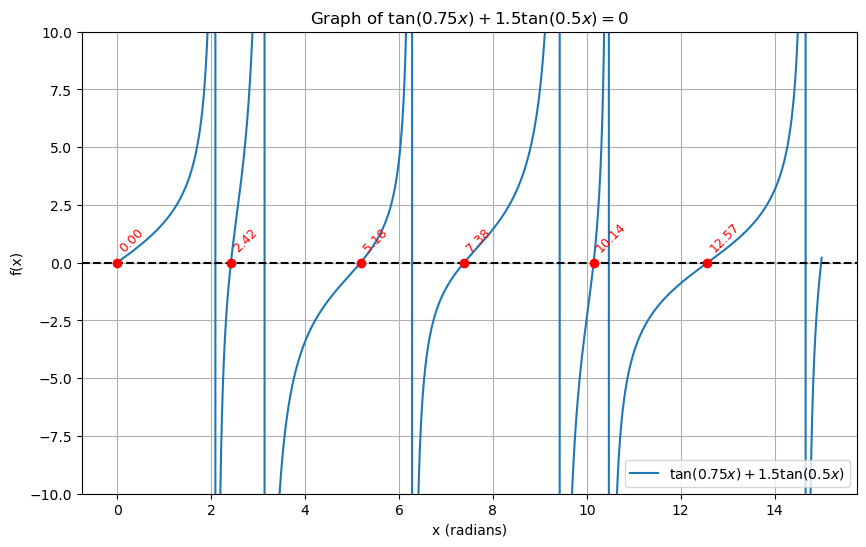

From the graph we see that the lowest non zero root is 2.4220082907088587 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

The lowest non-zero cutoff frequency comes out to


<IPython.core.display.Math object>

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from IPython.display import display, Math

def plot_tangent_equation(x_range=(0, 15), num_points=5000):
    """
    Graphs the function f(x) = tan(0.75x) + 1.5 tan(0.5x) and marks zero crossings.
    
    Parameters:
        x_range: tuple, range of x values (start, end)
        num_points: int, number of points for smooth plotting
    """
    # Define the function
    def f(x):
        return np.tan(0.75*x) + 1.5*np.tan(0.5*x)
    
    # Create x values
    x = np.linspace(x_range[0], x_range[1], num_points)
    
    # Evaluate function
    y = f(x)
    
    # Plot the function
    plt.figure(figsize=(10,6))
    plt.plot(x, y, label=r'$\tan(0.75x) + 1.5\tan(0.5x)$')
    plt.axhline(0, color='black', linestyle='--')
    
    # Limit y-axis to avoid tangent spikes
    plt.ylim(-10, 10)
    
    # Grid and labels
    plt.xlabel('x (radians)')
    plt.ylabel('f(x)')
    plt.title(r'Graph of $\tan(0.75x) + 1.5\tan(0.5x) = 0$')
    plt.grid(True)
    plt.legend()
    
    # Find approximate roots for marking
    guesses = np.arange(x_range[0], x_range[1], 1)  # initial guesses every 1 rad
    roots = []
    for g in guesses:
        root = fsolve(f, g)[0]
        # Avoid duplicates due to tangent periodicity
        if not any(np.isclose(root, r, atol=1e-3) for r in roots):
            roots.append(root)
    
    # Mark roots on the plot
    for r in roots:
        plt.plot(r, 0, 'ro')
        plt.text(r, 0.5, f'{r:.2f}', color='red', fontsize=9, rotation=45)
    
    plt.show()
    
    return roots

# Example usage:
roots = plot_tangent_equation()
print("From the graph we see that the lowest non zero root is", roots[1], "\n")

display(Math(rf"\therefore \qquad k_a a= {roots[1]}"))

#we defined x as a*k_a

display(Math(rf"""
\begin{{aligned}}[t]
& k_a a = {roots[1]:.4f} \\[2mm]
& \text{{given a is 2.2286 cm, }} k_a = {roots[1]:.4f} / {0.02286} \approx {roots[1]/0.00286:.4f} \\[2mm]
& k_a = \frac {{\omega}} {{c}}= \frac {{2\pi f}} {{c}} \\[2mm]


\end{{aligned}}
"""))
print("The lowest non-zero cutoff frequency comes out to")
display(Math(rf"f_{{cutoff}}= {((299792458*roots[1])/(0.02286*2*np.pi))*(1e-9)}\text{{ GHz}}"))


### Problem 2


In [234]:
import numpy as np
from IPython.display import display, Math

#Referencing example 3.2 from Microwave Engineering, Pozar 4th Edition pg.127
a=0.4e-2 # radius of the circular copper waveguide
epi_r=1.5 #relative permittivity of the dielectric
tand=2e-4 #loss tangent

#since the cutoff frequencies are all multiplied by a common factor lets pull that out
mf=299792458/(2*np.pi*a*np.sqrt(epi_r))

#for TE modes
pd11=1.841
pd21=3.054

#cutoff frequencies calculated for the TE modes
fc_te11=pd11*mf #pd is p'
fc_te21=pd21*mf

#for TM modes
p01=2.405
p11=3.832

#cutoff frequencies calculated for the TM modes
fc_tm01=p01*mf
fc_tm11=p11*mf

#calculating the wavenumber k for TE_11 mode propogating at 20 GHz
f_prop=20e+9
k=(2*np.pi*f_prop*np.sqrt(epi_r))/299792458 

prop_const=np.sqrt((k**2)-((pd11/a)**2))

attenuation=((k**2)*tand)/(2*prop_const)

display(Math(rf"""
\begin{{aligned}}[t]
& \text{{The first four propagating modes given by Fig.~3.12 from Pozar 4th ed., p.~127 are}} \\[1mm]
& TE_{{11}},\ TM_{{01}},\ TE_{{21}},\ TM_{{11}} \\[2mm]

& \text{{For }} TE_{{11}} \quad  f_c = \frac{{p_{{11}}^{{'}} c}}{{2\pi a \sqrt{{\epsilon_r}}}} \\[2mm]
& \qquad f_c = {fc_te11*1e-9} \text{{ GHz}} \\[2mm]

& \text{{For }} TM_{{01}} \quad  f_c = \frac{{p_{{01}} c}}{{2\pi a \sqrt{{\epsilon_r}}}} \\[2mm]
& \qquad f_c = {fc_tm01*1e-9} \text{{ GHz}} \\[2mm]

& \text{{For }} TE_{{21}} \quad  f_c = \frac{{p_{{21}}^{{'}} c}}{{2\pi a \sqrt{{\epsilon_r}}}} \\[2mm]
& \qquad f_c = {fc_te21*1e-9} \text{{ GHz}} \\[2mm]

& \text{{For }} TM_{{11}} \quad  f_c = \frac{{p_{{11}} c}}{{2\pi a \sqrt{{\epsilon_r}}}} \\[2mm]
& \qquad f_c = {fc_tm11*1e-9} \text{{ GHz}} \\ \\[2mm]

\\

& \text{{At 20 GHz you are only using TE11 mode since this frequency is just above this cutoff}} \\[2mm]

& \text{{the wave number is}} \\[2mm]
& k = \frac{{2 \pi f \sqrt{{\epsilon_r}} }}{{c }} = \frac{{2 \pi (20\ GHz) \sqrt{{1.5}} }}{{299792458 }} \\[2mm]
& \qquad k = {k} \quad m^{{-1}} \\[2mm]

\\

& \text{{the propogation constant is}} \\[2mm]
& \beta= \sqrt{{k^2-(\frac {{p_{{11}} ^{{'}} }}{{a}})^2}}  \\[2mm]
& \qquad \beta = {prop_const} \quad m^{{-1}} \\[2mm]

\\

& \text{{the total attenuation at 20 GHz is}} \\[2mm]
& \alpha_d = \frac{{k^2tan(\delta)}}{{2\beta}}  \\[2mm]
& \qquad \alpha_d = {attenuation} \quad Np/m \quad or \quad {attenuation*8.8636} \quad dB/m \\[2mm]

\end{{aligned}}
"""))



<IPython.core.display.Math object>